In [1]:
using Plots
using LinearAlgebra

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [2]:
include("CompQM.jl") 

In [3]:
module My

Base.@kwdef struct Parameters
    ħc::Float64 = 197.3 
    mc²::Float64 = 938 
    α::Float64 = 0.0072973525693 # fine-structure constant
    
    Z::Int64 
    N::Int64
    A::Int64 = Z+N
    
    # woods-saxon parameters
    a::Float64 = 0.67
    r₀::Float64 = 1.27
    R::Float64 = r₀*A^(1/3)
    V₀::Float64 = -51
    V₁::Float64 = 33
    
    # Skyrme parameters
    t₀::Float64 = -1128.75
    t₁::Float64 = 395.0
    t₂::Float64 = -95.0
    t₃::Float64 = 14000.0
    x₀::Float64 = 0.45
    x₁::Float64 = 0.0
    x₂::Float64 = 0.0
    x₃::Float64 = 1.0
    γ::Float64 = 1.0
    W₀::Float64 = 120.0
    
    # Paring Gap
    Δ = 11.2/sqrt(A)
end

Base.@kwdef struct Densities
    # number density
    ρ₀::Array{Float64, 1}
    ρ₁::Array{Float64, 1}
    
    # kinetic density
    τ₀::Array{Float64, 1}
    τ₁::Array{Float64, 1}
    
    # spin-orbit current
    J₀::Array{Float64, 1}
    J₁::Array{Float64, 1}
    
    # coulomb potential
    ϕ::Array{Float64, 1}
end

Base.@kwdef struct QuantumNumbers
    l::Int64
    j::Int64
    q::Int64
end

Base.@kwdef struct SingleParticleState 
    E::Float64 # energy
    qnums::QuantumNumbers
    u::Array{Float64, 1} # radial wave function 
end

end

using .My

In [87]:
function make_pars(Z, N; version=:SIII)
    if version==:SIII
        t₀ = -1128.75
        t₁ = 395.0
        t₂ = -95.0
        t₃ = 14000.0
        x₀ = 0.45
        x₁ = 0.0
        x₂ = 0.0
        x₃ = 1.0
        γ = 1.0
        W₀ = 130.0
        return My.Parameters(Z=Z, N=N, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    elseif version==:SkM
        t₀ = -2645.0
        t₁ = 410.0
        t₂ = -135.0
        t₃ = 15595.0
        x₀ = 0.09
        x₁ = 0.0
        x₂ = 0.0
        x₃ = 0.0
        γ = 1/6
        W₀ = 120.0
        return My.Parameters(Z=Z, N=N, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    elseif version==:SLy4
        t₀ = -2488.913
        t₁ = 486.818
        t₂ = -546.395
        t₃ = 13777.0
        x₀ = 0.834
        x₁ = -0.344
        x₂ = -1.000
        x₃ = 1.354
        γ = 1/6
        W₀ = 123.0
        return My.Parameters(Z=Z, N=N, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    elseif version==:SLy5
        t₀ = -2488.345
        t₁ = 484.230
        t₂ = -556.690
        t₃ = 13757.0
        x₀ = 0.776
        x₁ = -0.317
        x₂ = -1.000
        x₃ = 1.263
        γ = 1/6
        W₀ = 125.0
        return My.Parameters(Z=Z, N=N, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    elseif version==:SkP
        t₀ = -2931.6960
        t₁ = 320.6182
        t₂ = -337.4091
        t₃ = 18708.96
        x₀ = 0.2921515
        x₁ = 0.6531765
        x₂ = -0.5373230
        x₃ = 0.1810269
        γ = 1/6
        W₀ = 100.0
        return My.Parameters(Z=Z, N=N, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    elseif version==:Simplified
        α=0
        t₀ = -1800 
        t₁ = 0
        t₂ = 0
        t₃ = 12871
        x₀ = 0.5
        x₁ = 0
        x₂ = 0
        x₃ = 1
        γ = 1/3
        W₀ = 0
        return My.Parameters(Z=Z, N=N, α=α, t₀=t₀, t₁=t₁, t₂=t₂, t₃=t₃, x₀=x₀, x₁=x₁, x₂=x₂, x₃=x₃, γ=γ, W₀=W₀)
    end
end

make_pars (generic function with 1 method)

In [4]:
pars = My.Parameters(Z=8, N=8)
rs = range(0, 20, length=80+1)

0.0:0.25:20.0

In [146]:
"""
    initial_potential(pars, rs, qnums)

Calculate initial potential, which consists of woods-saxon, coulomb and
centrifugal potential.
"""
function initial_potential(pars, rs, qnums)
    ħc = pars.ħc
    mc² = pars.mc²
    α = pars.α
    
    a = pars.a
    r₀ = pars.r₀
    R = pars.R
    
    l = qnums.l
    j = qnums.j
    q = qnums.q
    
    V = pars.V₀ + q*pars.V₁*(pars.N - pars.Z)/pars.A
    ls = (j*(j+2) - 4l*(l+1) - 3)/8
    
    vpot = zeros(Float64, length(rs))
    
    # woods-saxon potential
    @. vpot += V/(1 + exp((rs - R)/a))
    @. vpot += V*ls*0.44*r₀^2/(a*rs) * exp((rs-R)/a)/(1 + exp((rs-R)/a))^2
    
    # coulomb potential by uniformly charged sphere with charge Z-1
    Z = pars.Z
    for i in 1:length(rs)
        if rs[i] ≤ R
            vpot[i] += (1-q)/2*ħc*α*(-(Z-1)/2R^3*rs[i]^2 + (3/2)*(Z-1)/R)
        else
            vpot[i] += (1-q)/2*ħc*α*(Z-1)/rs[i]
        end
    end
    
    # normalization
    @. vpot *= 2mc²/ħc^2
    
    # centrifugal potential
    @. vpot += l*(l+1)/rs^2
    
    # remove divergence at origin.
    #vpot[1] = 0
    
    return vpot
end

"""
    initical_emc²(pars, rs)

Calculate initial effective mass.
"""
function initial_emc²(pars, rs)
    return fill(pars.mc², length(rs))
end

"""
    calc_vho(pars, rs, qnums)

Calculate harmonic-oscillator potential plus centrifugal potential.
"""
function calc_vho(pars, rs, qnums)
    l = qnums.l
    ħω = 10
    vpot = zeros(Float64, length(rs))
    
    # harmonic-oscillator potential
    @. vpot = (pars.mc²/2pars.ħc^2)*ħω^2*rs^2- 40
    @. vpot *= 2pars.mc²/pars.ħc^2
    
    # centrifugal potential
    @. vpot += l*(l+1)/rs^2
    
    # remove divergence at origin.
    #vpot[1] = 0
    
    return vpot
end


function test_initial_potential(pars, rs; l=0, j=1, q=1)
    qnums = My.QuantumNumbers(l=l, j=j, q=q)
    @time vpot = initial_potential(pars, rs, qnums)
    vho = calc_vho(pars, rs, qnums)
    plot(rs, vpot, ylims=(-3,1), label="woods-saxon")
    plot!(rs, vho, label="vho")
end
    

test_initial_potential (generic function with 1 method)

  0.000011 seconds (1 allocation: 736 bytes)


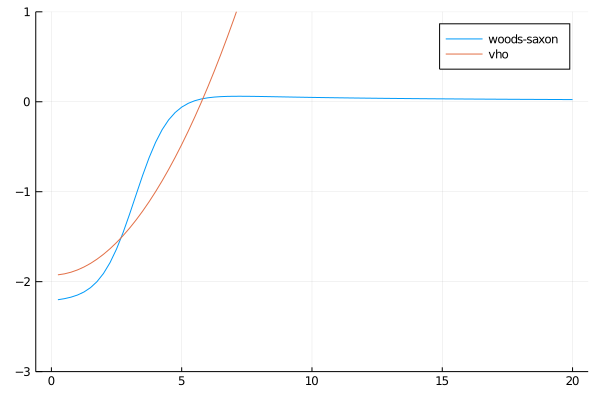

In [46]:
test_initial_potential(pars, rs; q=-1, l=0)

In [7]:
function trapezoidal_rule(rs, f)
    h = rs[2] - rs[1]
    sum(f[2:end])*h
end

function solve_scheq(pars, rs, vpot, emc², E, qnums)
    mc² = pars.mc²
    ħc = pars.ħc
    
    l = qnums.l
    
    k² = zeros(Float64, length(rs))
    @. k² = -vpot + E*2emc²/ħc^2
    
    S = zeros(Float64, length(rs))
    
    # matching point
    h = rs[2] - rs[1]
    irc = floor(Int, pars.R/h)
    
    # outward integration
    u₁ = zeros(Float64, length(rs))
    #@. u₁[2:3] = rs[2:3]^(l+1)
    u₁[2] = rs[2]^(l+1)
    if l==1
        u₁[3] = 2(1 - (5h^2/12)*k²[2])*u₁[2] + (h^2/12)*l*(l+1)
        u₁[3] /= 1 + (h^2/12)*k²[3]
    else
        u₁[3] = 2(1 - (5h^2/12)*k²[2])*u₁[2]
        u₁[3] /= 1 + (h^2/12)*k²[3]
    end
    for ir in 3:irc-1
        u₁[ir+1] = numerov(ir, rs, k², S, u₁[ir-1], u₁[ir])
    end
    
    # inward integration
    u₂ = zeros(Float64, length(rs))
    if k²[end] < 0
        κ = sqrt(-k²[end])
        @. u₂[end-1:end] = exp(-κ*rs[end-1:end])
    else
        k = sqrt(k²[end])
        @. u₂[end-1:end] = sin(k*(rs[end-1:end] - rs[end]))
    end
    for ir in length(rs)-1: -1: irc+1
        u₂[ir-1] = numerov(ir, rs, k², S, u₂[ir+1], u₂[ir]; sign=-1)
    end
    
    # normalize u₂ so that u₁[irc] = u₂[irc]
    @. u₂ *= u₁[irc]/u₂[irc]
    u = vcat(u₁[1:irc], u₂[irc+1:end])
    
    # normalize wave function
    norm = trapezoidal_rule(rs, @. emc²*u^2)
    u /= sqrt(norm)
    
    # calculate discontinuity at matching point
    discontinuity = (u[irc-1] + u[irc+1] - (2 - h^2*k²[irc])*u[irc])/h
    
    @. u = sqrt(emc²)*u
    
    return u, discontinuity
end

function calc_discontinuity(E, pars, rs, vpot, emc², qnums)
    u, discontinuity = solve_scheq(pars, rs, vpot, emc², E, qnums)
    return discontinuity
end

function test_solve_scheq(pars, rs, qnums; E=-25)
    vinit = initial_potential(pars, rs, qnums)
    vho = calc_vho(pars, rs, qnums)
    emc² = initial_emc²(pars, rs)
    
    @time E = bisect(calc_discontinuity, -20, -10, args=(pars, rs, vho, emc², qnums))
    @time u, discontinuity = solve_scheq(pars, rs, vho, emc², E, qnums)
    
    @show E discontinuity trapezoidal_rule(rs, u.^2)
    plot(rs, (@. u/rs^(qnums.l + 1)), xlims=(0,6))
end

test_solve_scheq (generic function with 1 method)

  0.071769 seconds (36.73 k allocations: 2.250 MiB)
  0.000010 seconds (11 allocations: 6.609 KiB)
E = -15.006477237911895
discontinuity = -2.668615328715873e-12
trapezoidal_rule(rs, u .^ 2) = 1.0


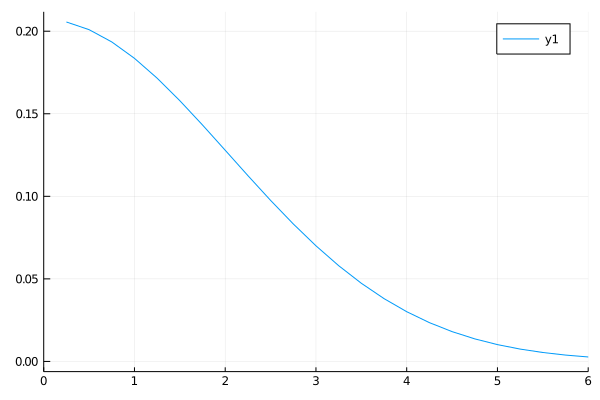

In [8]:
qnums = My.QuantumNumbers(l=1,j=1,q=1)
rs = range(0, 20, length=80+1)
test_solve_scheq(pars, rs, qnums) 

In [9]:
function shooting(pars, rs, vpot, emc², Es, qnums)
    states = My.SingleParticleState[]
    
    for i in 1:length(Es)-1
        d₁ = calc_discontinuity(Es[i], pars, rs, vpot, emc², qnums)
        d₂ = calc_discontinuity(Es[i+1], pars, rs, vpot, emc², qnums)
        
        if d₁*d₂ < 0
            E = bisect(calc_discontinuity, Es[i], Es[i+1], args=(pars, rs, vpot, emc², qnums))
            if abs(calc_discontinuity(E, pars, rs, vpot, emc², qnums)) < 1e-5
                u, discontinuity = solve_scheq(pars, rs, vpot, emc², E, qnums)
                push!(states, My.SingleParticleState(E=E, qnums=qnums, u=u))
            end
        end
    end
    
    return states
end

"""
    sort_states(states)

Sort states::Array{SingleParticleStates, 1} such that states[i].E ≤ states[j].E for i < j
"""
function sort_states(states)
    n_states = length(states)
    for i in 1:n_states-1
        for j in i+1:n_states
            if states[i].E > states[j].E
                temp = states[i]
                states[i] = states[j]
                states[j] = temp
            end
        end
    end
    return states
end
    

"""
    show_states(states)

Show energy and quantum numbers of each s. p. states.
"""
function show_states(states)
    for i in 1:length(states)
        println("i = $i")
        @show states[i].E states[i].qnums
        println("")
    end
end

"""
    show_states(states, occ)

Show energy, quantum numbers and occupation number of each s. p. states.
"""
function show_states(states, occ)
    for i in 1:length(states)
        println("i = $i")
        @show states[i].E states[i].qnums occ[i]
        println("")
    end
end


function plot_states(rs, states; nstates=length(states), derivative=false)
    p = plot()
    for i in 1:nstates
        plot!(p, rs, states[i].u, label="i = $i")
    end
    if derivative
        for i in 1:nstates
            du = derivative_5p(rs, states[i].u; parity=(-1)^(states[i].qnums.l+1))
            plot!(p, rs, du, label="i = $i")
        end
    end
    return p
end
        

function test_shooting(pars, rs, qnums; derivative=false)
    vho = calc_vho(pars, rs, qnums)
    emc² = initial_emc²(pars, rs)
    
    Es = range(-40, 40, length=10)
    
    @time states = shooting(pars, rs, vho, emc², Es, qnums)
    show_states(states)
    plot_states(rs, states; derivative=derivative)
end

test_shooting (generic function with 1 method)

  0.001519 seconds (3.47 k allocations: 1.508 MiB)
i = 1
(states[i]).E = -15.00014202979704
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)

i = 2
(states[i]).E = 4.999583500903101
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)

i = 3
(states[i]).E = 25.00116363995605
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)



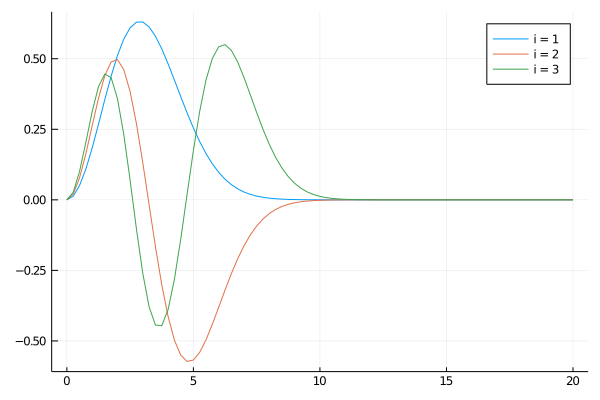

In [159]:
qnums = My.QuantumNumbers(l=1, j=1, q=1)
test_shooting(pars, rs, qnums)

In [47]:
function initial_states(pars, rs; lmax=2)
    Es = range(-50, -0, length=10)
    states = My.SingleParticleState[]
    emc² = initial_emc²(pars, rs)
    
    for l in 0:lmax,  j in 2l+1: -2: max(2l-1, 0),  q in 1: -2: -1
        qnums = My.QuantumNumbers(l=l, j=j, q=q)
        vpot = initial_potential(pars, rs, qnums)
        
        states = vcat(states, shooting(pars, rs, vpot, emc², Es, qnums))
    end
    
    return sort_states(states)
end

"""
    calc_occ(pars, states)

calculate occupation number .
"""
function calc_occ(pars, states)
    Z = pars.Z
    N = pars.N
    occ = zeros(Float64, length(states))
    
    # calculate occupation number 
    n_prot = 0
    n_neut = 0
    for i in 1:length(states)
        j = states[i].qnums.j
        q = states[i].qnums.q
        if q == -1 # proton
            if n_prot + (j+1) ≤ Z
                occ[i] = 1
                n_prot += (j+1)
            elseif n_prot < Z
                occ[i] = (Z - n_prot)/(j+1)
                n_prot = Z
            end
        elseif q == 1 # neutron
            if n_neut + (j+1) ≤ N
                occ[i] = 1
                n_neut += (j+1)
            elseif n_neut < N
                occ[i] = (N - n_neut)/(j+1)
                n_neut = N
            end
        end
    end
    @assert n_prot == Z && n_neut == N
    
    return occ
end

function test_initial_states(pars, rs; derivative=false)
    @time states = initial_states(pars, rs)
    occ = calc_occ(pars, states)
    show_states(states, occ)
    plot_states(rs, states; derivative=derivative)
end

test_initial_states (generic function with 1 method)

  0.003672 seconds (12.83 k allocations: 5.780 MiB)
i = 1
(states[i]).E = -31.07223601028737
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, 1)
occ[i] = 1.0

i = 2
(states[i]).E = -27.020027793736922
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, -1)
occ[i] = 1.0

i = 3
(states[i]).E = -18.597374633989403
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, 1)
occ[i] = 1.0

i = 4
(states[i]).E = -14.975635750064004
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, -1)
occ[i] = 1.0

i = 5
(states[i]).E = -13.446401820207635
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)
occ[i] = 1.0

i = 6
(states[i]).E = -9.844461199180737
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, -1)
occ[i] = 1.0

i = 7
(states[i]).E = -6.350060078612942
(states[i]).qnums = Main.My.QuantumNumbers(2, 5, 1)
occ[i] = 0.0

i = 8
(states[i]).E = -3.977410766593594
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, 1)
occ[i] = 0.0

i = 9
(states[i]).E = -3.1980967816909662
(states[i]).qnums = Main.My.QuantumNumbers(

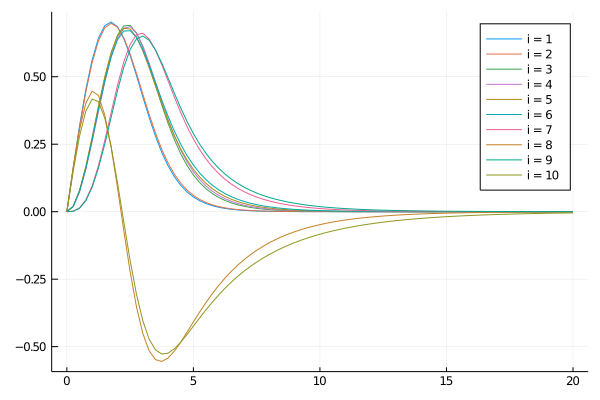

In [48]:
test_initial_states(pars, rs; derivative=false)

In [156]:
"""
    calc_density(pars, rs,states, occ)

calculate number density, kinetic density and spin-orbit current.
"""
function calc_density(pars, rs, states, occ)
    ngrids = length(rs)
    nstates = length(states)
    
    temp = zeros(Float64, ngrids)
    R = zeros(Float64, ngrids)
    ρ₀ = zeros(Float64, ngrids)
    ρ₁ = zeros(Float64, ngrids)
    τ₀ = zeros(Float64, ngrids)
    τ₁ = zeros(Float64, ngrids)
    J₀ = zeros(Float64, ngrids)
    J₁ = zeros(Float64, ngrids)
    
    for i in 1:nstates
        l = states[i].qnums.l
        j = states[i].qnums.j
        q = states[i].qnums.q
        
        u = states[i].u
        du = derivative_5p(rs, u; parity=(-1)^(l+1), order=1)
        
        # number density
        @. temp = occ[i] * (j+1)/4π * (u/rs)^2
        if l==0 # extrapolation of temp[1]
            temp[1] = 4temp[2] - 6temp[3] + 4temp[4] - temp[5]
        else
            temp[1] = 0
        end
        @. ρ₀ += temp
        @. ρ₁ += q*temp
        
        # kinetic density
        @. temp = occ[i] * (j+1)/4π * ( (du/rs - u/rs^2)^2 + l*(l+1)*(u/rs^2)^2 )
        if l==0 # extrapolation of temp[1]
            temp[1] = 0
        elseif l==1
            temp[1] = 4temp[2] - 6temp[3] + 4temp[4] - temp[5]
        else
            temp[1] = 0
        end
        @. τ₀ += temp
        @. τ₁ += q*temp
        
        # spin-orbit current
        ls = (j*(j+2) - 4l*(l+1) - 3)/8
        @. temp = occ[i] * (j+1)/2π * ls/rs * (u/rs)^2
        temp[1] = 0 # remove divergence at r=0
        @. J₀ += temp
        @. J₁ += q*temp
    end
    
    # coulomb potential
    ϕ = solve_poisson(pars.Z, rs, @. (ρ₀ - ρ₁)/2)
    
    dens = My.Densities(ρ₀=ρ₀, ρ₁=ρ₁, τ₀=τ₀, τ₁=τ₁, J₀=J₀, J₁=J₁, ϕ=ϕ)
    return dens
end
    

function plot_density(rs, dens; xlims=(0,10), ρ=true, τ=true, J=true, ϕ=false)
    p = plot(xlims=xlims)
    
    if ρ
        plot!(p, rs, dens.ρ₀, label="ρ₀")
        plot!(p, rs, dens.ρ₁, label="ρ₁")
        
        dρ₀ = derivative_5p(rs, dens.ρ₀; parity=1, order=1)
        plot!(p, rs, dρ₀, label="dρ₀")
        
        d²ρ₀ = derivative_5p(rs, dens.ρ₀; parity=1, order=2)
        plot!(p, rs, d²ρ₀, label="d²ρ₀")
    end
    
    if τ
        plot!(p, rs, dens.τ₀, label="τ₀")
        plot!(p, rs, dens.τ₁, label="τ₁")
    end
    
    if J
        plot!(p, rs, dens.J₀, label="J₀")
        plot!(p, rs, dens.J₁, label="J₁")
        
        dJ₀ = derivative_5p(rs, dens.J₀; parity=-1, order=1)
        plot!(p, rs, dJ₀, label="dJ₀")
    end
    
    if ϕ
        plot!(p, rs, dens.ϕ, label="ϕ")
    end
    
    return p
end

function test_calc_density(pars, rs; ρ=true, τ=true, J=true, ϕ=false, xlims=(0,10))
    @time states = initial_states(pars, rs)
    show_states(states)
    occ = calc_occ(pars, states)
    
    @time dens = calc_density(pars, rs, states, occ)
    plot_density(rs, dens; ρ=ρ, τ=τ, J=J, ϕ=ϕ, xlims=xlims)
end

test_calc_density (generic function with 1 method)

In [157]:
rs = range(0, 20, length=80+1)
test_calc_density(pars, rs; ρ=true, τ=false, J=false, ϕ=false, xlims=(0,10))

  0.008852 seconds (30.62 k allocations: 13.334 MiB)
i = 1
(states[i]).E = -39.95301635780681
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, 1)

i = 2
(states[i]).E = -36.10955011358277
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, 1)

i = 3
(states[i]).E = -35.74185183323506
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)

i = 4
(states[i]).E = -32.59171263780444
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, -1)

i = 5
(states[i]).E = -31.579482956375514
(states[i]).qnums = Main.My.QuantumNumbers(2, 5, 1)

i = 6
(states[i]).E = -30.669431098633353
(states[i]).qnums = Main.My.QuantumNumbers(2, 3, 1)

i = 7
(states[i]).E = -29.45924362995559
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, 1)

i = 8
(states[i]).E = -29.306018606035245
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, -1)

i = 9
(states[i]).E = -28.77201240820189
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, -1)

i = 10
(states[i]).E = -25.14075824033676
(states[i]).qnums = Main.My.QuantumNumbers(2, 5, -1)


AssertionError: AssertionError: n_prot == Z && n_neut == N

In [152]:
function calc_emc²(pars, rs, dens, q)
    ħc = pars.ħc
    mc² = pars.mc²
    
    t₁ = pars.t₁
    t₂ = pars.t₂
    x₁ = pars.x₁
    x₂ = pars.x₂
    
    emc² = zeros(Float64, length(rs))
    @. emc² = 1/mc² +
        (1/8ħc^2)*(3t₁ + 5t₂*(1 + (4/5)*x₂))*dens.ρ₀ +
        (1/8ħc^2)*(-t₁*(1 + 2x₁) + t₂*(1 + 2x₂))*q*dens.ρ₁
    @. emc² = 1/emc²
    
    return emc²
end

function test_calc_emc²(pars, rs, qnums)
    @time states = initial_states(pars, rs)
    occ = calc_occ(pars, states)
    
    @time dens = calc_density(pars, rs, states, occ)
    
    emc² = calc_emc²(pars, rs, dens, qnums.q)
    plot(rs, emc², label="emc²")
end

test_calc_emc² (generic function with 1 method)

In [153]:
qnums = My.QuantumNumbers(l=0, j=1, q=1)
test_calc_emc²(pars, rs, qnums)

  0.031673 seconds (30.62 k allocations: 26.054 MiB, 50.27% gc time)


AssertionError: AssertionError: n_prot == Z && n_neut == N

In [63]:
function calc_potential(pars, rs, dens, emc², qnums; J²_term=false)
    ħc = pars.ħc
    α = pars.α
    
    t₀ = pars.t₀
    t₁ = pars.t₁
    t₂ = pars.t₂
    t₃ = pars.t₃
    x₀ = pars.x₀
    x₁ = pars.x₁
    x₂ = pars.x₂
    x₃ = pars.x₃
    γ = pars.γ
    W₀ = pars.W₀
    
    ρ₀ = dens.ρ₀
    ρ₁ = dens.ρ₁
    τ₀ = dens.τ₀
    τ₁ = dens.τ₁
    J₀ = dens.J₀
    J₁ = dens.J₁
    ϕ = dens.ϕ
    
    l = qnums.l
    j = qnums.j
    q = qnums.q
    ls = (j*(j+2) - 4l*(l+1) - 3)/8
    
    vpot = zeros(Float64, length(rs))
    #p = plot(xlims=(0,5))
    
    # t₀ term
    @. vpot += (3t₀/4)*ρ₀ - (t₀/4)*(1 + 2x₀)*q*ρ₁
    
    # t₃ term 
    #@. vpot += (t₃/16)*(γ+2)*ρ₀^(γ+1) - (t₃/24)*(1+2x₃)*q*ρ₁
    @. vpot += (t₃/16)*(γ+2)*ρ₀^(γ+1) - 
        (t₃/48)*(1+2x₃)*(γ*ρ₀^(γ-1)*ρ₁^2 + 2q*ρ₀^γ*ρ₁)
    
    # ρτ term
    @. vpot += (1/16)*(3t₁ + 5t₂*(1 + 4x₂/5))*τ₀ + 
        (1/16)*(-t₁*(1 + 2x₁) + t₂*(1 + 2x₂))*q*τ₁
    
    # (∇ρ)² term
    d²ρ₀ = derivative_5p(rs, ρ₀; parity=1, order=2)
    d²ρ₁ = derivative_5p(rs, ρ₁; parity=1, order=2)
    @. vpot += -(1/32)*(9t₁ - 5t₂*(1 + (4/5)*x₂))*d²ρ₀ + 
        (1/32)*(3t₁*(1 + 2x₁) + t₂*(1 + 2x₂))*q*d²ρ₁
    
    # J² term
    if J²_term
        @. vpot += (1/8)*(t₁*(1 - 2x₁) - t₂*(1 + 2x₂))*J₀*ls/rs + 
            (1/8)*(t₁ - t₂)*J₁*q*ls/rs
    end
    
    # W₀ term
    dρ₀ = derivative_5p(rs, ρ₀; parity=1, order=1)
    dρ₁ = derivative_5p(rs, ρ₁; parity=1, order=1)
    dJ₀ = derivative_5p(rs, J₀; parity=-1, order=1)
    dJ₁ = derivative_5p(rs, J₁; parity=-1, order=1)
    @. vpot += ((3W₀/2)*dρ₀ + (W₀/2)*dρ₁*q)*ls/rs - 
        ((3W₀/4)*dJ₀ + (W₀/4)*dJ₁*q)
    
    # Coulomb term
    @. vpot += ((1-q)/2)*(ħc*α)*( ϕ - (3/π*(ρ₀ - ρ₁)/2)^(1/3) )
    
    # normalization
    @. vpot *= 2emc²/ħc^2
    
    # effective mass term
    demc² = derivative_5p(rs, emc²; parity=1, order=1)
    d²emc² = derivative_5p(rs, emc²; parity=1, order=2)
    @. vpot += (5/4)*(demc²/emc²)^2 - (d²emc²/emc²)
    
    # centrifugal potential
    @. vpot += l*(l+1)/rs^2
    
    #vpot[1] = 0
    
    return vpot
end


function test_calc_potential(pars, rs, qnums)
    @time states = initial_states(pars, rs)
    occ = calc_occ(pars, states)
    
    @time dens = calc_density(pars, rs, states, occ)
    
    emc² = calc_emc²(pars, rs, dens, qnums.q)
    
    vpot = calc_potential(pars, rs, dens, emc², qnums)
    plot(rs, vpot, xlims=(0,20))
end

test_calc_potential (generic function with 1 method)

  0.003815 seconds (12.83 k allocations: 5.780 MiB)
  0.000036 seconds (23 allocations: 15.875 KiB)


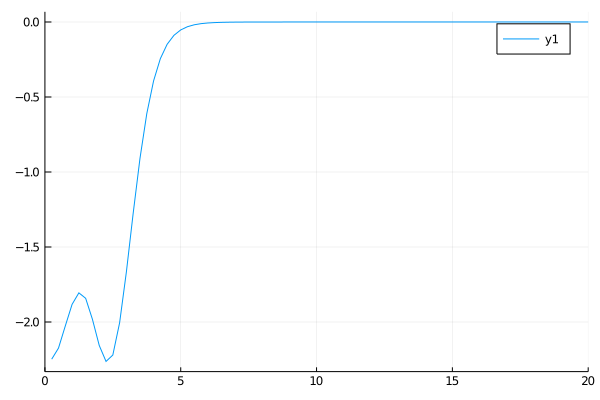

In [64]:
qnums = My.QuantumNumbers(l=0,j=1,q=1)
rs = range(0, 20, length=80+1)
test_calc_potential(pars, rs, qnums)

In [143]:
function calc_energy(pars, rs, dens)
    ħc = pars.ħc
    mc² = pars.mc²
    α = pars.α 
    
    t₀ = pars.t₀
    t₁ = pars.t₁
    t₂ = pars.t₂
    t₃ = pars.t₃
    x₀ = pars.x₀
    x₁ = pars.x₁
    x₂ = pars.x₂
    x₃ = pars.x₃
    γ = pars.γ
    W₀ = pars.W₀
    
    ρ₀ = dens.ρ₀
    ρ₁ = dens.ρ₁
    τ₀ = dens.τ₀
    τ₁ = dens.τ₁
    J₀ = dens.J₀
    J₁ = dens.J₁
    ϕ = dens.ϕ
    
    # energy density
    ε = zeros(Float64, length(rs))
    
    # kinetic term
    @. ε += (ħc^2/2mc²)*τ₀ *(1 - 1/pars.A)
    
    # t₀ term
    @. ε += (3t₀/8)*ρ₀^2 - (t₀/8)*(1 + 2x₀)*ρ₁^2
    
    # t₃ term
    @. ε += (t₃/16)*ρ₀^(γ+2) - (t₃/48)*(1 + 2x₃)*ρ₀^γ*ρ₁^2
    
    # ρτ term
    @. ε += (1/16)*(3t₁ + 5t₂*(1 + 4x₂/5))*ρ₀*τ₀ + 
        (1/16)*(-t₁*(1 + 2x₁) + t₂*(1 + 2x₂))*ρ₁*τ₁
    
    # (∇ρ)² term
    dρ₀ = derivative_5p(rs, ρ₀; parity=1, order=1)
    dρ₁ = derivative_5p(rs, ρ₁; parity=1, order=1)
    @. ε += (1/64)*(9t₁ - 5t₂*(1 + 4x₂/5))*dρ₀^2 - 
        (1/64)*(3t₁*(1 + 2x₁) + t₂*(1 + 2x₂))*dρ₁^2
    
    # J² term 
    #@. ε += (1/32)*(t₁*(1 - 2x₁) - t₂*(1 + 2x₂))*J₀^2 + (1/32)*(t₁ - t₂)*J₁^2
    
    # W₀ term
    @. ε += (3W₀/4)*J₀*dρ₀ + (W₀/4)*J₁*dρ₁
    
    # coulomb direct term
    @. ε += (ħc*α/2)*(ρ₀ - ρ₁)/2*ϕ 
    
    # coulomb exchange term
    @. ε += - (3ħc*α/4)*(3/π)^(1/3)*((ρ₀ - ρ₁)/2)^(4/3)
    
    E = trapezoidal_rule(rs, @. 4π*rs^2*ε)
    return E
end

function calc_energy(pars, rs, dens, states, occ)
    ħc = pars.ħc
    mc² = pars.mc²
    α = pars.α
    
    t₀ = pars.t₀
    t₁ = pars.t₁
    t₂ = pars.t₂
    t₃ = pars.t₃
    x₀ = pars.x₀
    x₁ = pars.x₁
    x₂ = pars.x₂
    x₃ = pars.x₃
    γ = pars.γ
    W₀ = pars.W₀
    
    ρ₀ = dens.ρ₀
    ρ₁ = dens.ρ₁
    τ₀ = dens.τ₀
    τ₁ = dens.τ₁
    J₀ = dens.J₀
    J₁ = dens.J₁
    ϕ = dens.ϕ
    
    ε = zeros(Float64, length(rs))
    
    # kinetic energy
    @. ε += (ħc^2/4mc²)*τ₀*(1 - 1/pars.A)
    
    # rearrangement energy
    @. ε += - (t₃/32)*γ*(ρ₀^(γ+2) - (1/3)*(1 + 2x₃)*ρ₀^γ*ρ₁^2) -
        (ħc*α/4)*(3/π)^(1/3)*((ρ₀ + ρ₁)/2)^(4/3)
    
    
    E = trapezoidal_rule(rs, @. 4π*rs^2*ε)
    
    for i in 1:length(states)
        E += (1/2)*occ[i]*states[i].E
    end
    
    return E
end
    
    

"""
    average_density(rs, d₁, d₂)

Average two densities d₁ and d₂.
"""
function average_density(rs, d₁, d₂)
    n_grids = length(rs)
    
    ρ₀ = zeros(Float64, n_grids)
    ρ₁ = zeros(Float64, n_grids)
    τ₀ = zeros(Float64, n_grids)
    τ₁ = zeros(Float64, n_grids)
    J₀ = zeros(Float64, n_grids)
    J₁ = zeros(Float64, n_grids)
    ϕ = zeros(Float64, n_grids)
    
    @. ρ₀ = (d₁.ρ₀ + d₂.ρ₀)/2   
    @. ρ₁ = (d₁.ρ₁ + d₂.ρ₁)/2   
    @. τ₀ = (d₁.τ₀ + d₂.τ₀)/2   
    @. τ₁ = (d₁.τ₁ + d₂.τ₁)/2   
    @. J₀ = (d₁.J₀ + d₂.J₀)/2   
    @. J₁ = (d₁.J₁ + d₂.J₁)/2   
    @. ϕ = (d₁.ϕ + d₂.ϕ)/2
    
    d = My.Densities(ρ₀=ρ₀, ρ₁=ρ₁, τ₀=τ₀, τ₁=τ₁, J₀=J₀, J₁=J₁, ϕ=ϕ)
    return d
end


function HF_calc(pars, rs; Erange=range(-50, 0, length=20), lmax=10, iter_max=20, rtol=1e-5)
    states = initial_states(pars, rs; lmax=lmax)
    occ = calc_occ(pars, states)
    dens = calc_density(pars, rs, states, occ)
    energy = Float64[]
    
    @show 1
    
    for iter in 1:iter_max
        states = My.SingleParticleState[]
        
        for l in 0:lmax,  j in 2l+1: -2: max(2l-1,0),  q in 1: -2: -1
            qnums = My.QuantumNumbers(l=l, j=j, q=q)
            emc² = calc_emc²(pars, rs, dens, qnums.q)
            vpot = calc_potential(pars, rs, dens, emc², qnums)
            states = vcat(states, shooting(pars, rs, vpot, emc², Erange, qnums))
        end
        states = sort_states(states)
        occ = calc_occ(pars, states)
        dens_new = calc_density(pars, rs, states, occ)
        dens = average_density(rs, dens, dens_new)
        push!(energy, calc_energy(pars, rs, dens)/pars.A)
    end
    
    return dens, states, occ, energy
end
        

HF_calc (generic function with 1 method)

1 = 1
  1.250255 seconds (1.42 M allocations: 1.252 GiB, 25.49% gc time)
energy[end] = -7.708796098748558
i = 1
(states[i]).E = -46.326617734800834
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, 1)
occ[i] = 1.0

i = 2
(states[i]).E = -45.73348511108443
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, 1)
occ[i] = 1.0

i = 3
(states[i]).E = -41.533301873622754
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, -1)
occ[i] = 1.0

i = 4
(states[i]).E = -41.39997614302524
(states[i]).qnums = Main.My.QuantumNumbers(1, 3, -1)
occ[i] = 1.0

i = 5
(states[i]).E = -40.4602078206249
(states[i]).qnums = Main.My.QuantumNumbers(1, 1, -1)
occ[i] = 1.0

i = 6
(states[i]).E = -40.450243634710986
(states[i]).qnums = Main.My.QuantumNumbers(2, 5, 1)
occ[i] = 1.0

i = 7
(states[i]).E = -39.15497552309381
(states[i]).qnums = Main.My.QuantumNumbers(2, 3, 1)
occ[i] = 1.0

i = 8
(states[i]).E = -37.09358124454555
(states[i]).qnums = Main.My.QuantumNumbers(0, 1, 1)
occ[i] = 1.0

i = 9
(states[i]).E = -34.5055570

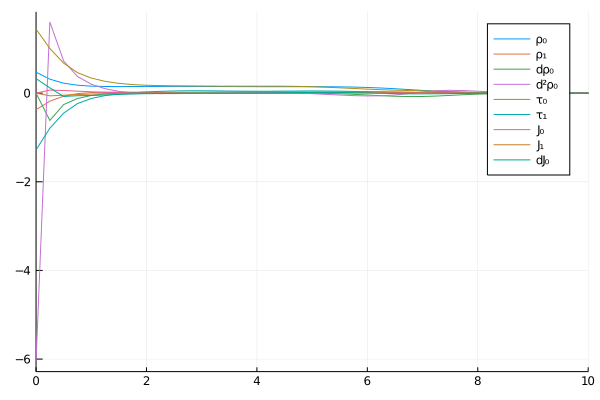

In [150]:
pars = make_pars(82, 126; version=:SIII)
rs = range(0, 20, length=80+1)

@time dens, states, occ, energy = HF_calc(pars, rs)
@show energy[end] 
show_states(states, occ)
plot_density(rs, dens)

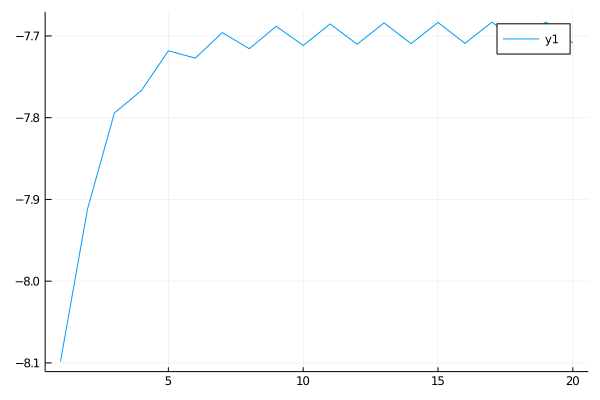

In [151]:
plot(energy)

# Continuum RPA

In [82]:
function calc_radial_green_function(pars, rs, vpot, emc², ε, qnums; iw=div(length(rs), 2))
    @assert imag(ε) ≥ 0
    
    mc² = pars.mc²
    ħc = pars.ħc
    
    ngrids = length(rs)
    h = rs[2] - rs[1]
    
    l = qnums.l
    
    k² = zeros(Complex{Float64}, ngrids)
    @. k² = -vpot + ε*2emc²/ħc^2 #ここ！
    
    S = zeros(Float64, ngrids)
    
    # outward integration
    u₁ = zeros(Complex{Float64}, ngrids)
    u₁[2] = rs[2]^(l+1)
    if l==1
        u₁[3] = 2(1 - (5h^2/12)*k²[2])*u₁[2] + (h^2/12)*l*(l+1)
        u₁[3] /= 1 + (h^2/12)*k²[3]
    else
        u₁[3] = 2(1 - (5h^2/12)*k²[2])*u₁[2]
        u₁[3] /= 1 + (h^2/12)*k²[3]
    end
    for ir in 3:ngrids-1
        u₁[ir+1] = numerov(ir, rs, k², S, u₁[ir-1], u₁[ir])
    end
    
    # inward integration
    u₂ = zeros(Complex{Float64}, ngrids)
    k = sqrt(k²[end])
    @. u₂[end-1:end] = exp(im*k*rs[end-1:end])
    for ir in ngrids-1: -1: 3
        u₂[ir-1] = numerov(ir, rs, k², S, u₂[ir+1], u₂[ir]; sign=-1)
    end
    u₂[1] = 4u₂[2] - 6u₂[3] + 4u₂[4] - u₂[5]
    
    # calculate Wronskian
    du₁ = (-(1/12)*u₁[iw+2] + (2/3)*u₁[iw+1] - (2/3)*u₁[iw-1] + (1/12)*u₁[iw-2])/h
    du₂ = (-(1/12)*u₂[iw+2] + (2/3)*u₂[iw+1] - (2/3)*u₂[iw-1] + (1/12)*u₂[iw-2])/h
    wronskian = (ħc^2/2mc²)*(du₁*u₂[iw] - du₂*u₁[iw]) 
    #@show wronskian  iw
    
    # calculate radial green function 
    green_function = zeros(Complex{Float64}, ngrids, ngrids)
    for jr in 1:ngrids,  ir in 1:jr
        green_function[ir, jr] = u₁[ir]*u₂[jr]/wronskian
    end
    
    return Symmetric(green_function)
end

function test_calc_radial_green_function(pars, rs, qnums; ω=-10, iw=div(length(rs), 2))
    vpot = initial_potential(pars, rs, qnums)
    emc² = initial_emc²(pars, rs)
    @time green_function = calc_radial_green_function(pars, rs, vpot, emc², ω, qnums; iw=iw)
end

test_calc_radial_green_function (generic function with 1 method)

In [83]:
qnums = My.QuantumNumbers(l=0, j=1, q=1)
test_calc_radial_green_function(pars, rs, qnums; ω=10)

  0.000118 seconds (7 allocations: 107.750 KiB)


81×81 Symmetric{Complex{Float64},Array{Complex{Float64},2}}:
  0.0+0.0im           0.0+0.0im          …          0.0-0.0im
  0.0+0.0im     0.0106182+0.0043587im        0.00261141-0.0171981im
 -0.0+0.0im    0.00764328+0.00793703im       0.00475529-0.0313171im
 -0.0+0.0im    0.00330471+0.0101004im        0.00605142-0.039853im
 -0.0+0.0im   -0.00162046+0.0104745im        0.00627556-0.0413292im
  0.0-0.0im   -0.00626279+0.00900993im   …   0.00539809-0.0355504im
  0.0-0.0im   -0.00982237+0.00598382im       0.00358507-0.0236103im
  0.0-0.0im    -0.0117145+0.00193852im       0.00116142-0.00764878im
  0.0-0.0im    -0.0116689-0.00243127im      -0.00145664+0.00959304im
  0.0-0.0im   -0.00976115-0.00641815im      -0.00384529+0.025324im
  0.0-0.0im   -0.00636882-0.00943667im   …  -0.00565376+0.0372342im
  0.0-0.0im   -0.00206568-0.0111202im       -0.00666242+0.0438769im
  0.0-0.0im    0.00251584-0.0113573im       -0.00680449+0.0448125im
     ⋮                                   ⋱             ⋮
  0.

In [42]:
function calc_reduced_matrix_element(l₂, j₂, λ, l, j)
    if isodd(l + l₂ + λ)
        return 0.0
    end
    
    M = (-1)^div(j₂+1,2)*sqrt((j+1)*(j₂+1)*(2λ+1)/4π)*wigner3j(j₂, 2λ, j, 1, 0, -1)
    return M
end



function calc_free_response_function(pars, rs, states, occ, dens, ω, L; lmax=10, η=0)
    ngrids = length(rs)
    nstates = length(states)
    
    Π₀ = zeros(Complex{Float64}, ngrids, ngrids, 2)
    vpot = zeros(Float64, ngrids)
    for istate in 1:nstates
        if occ[istate]==1.0
            ϕ₁ = states[istate].u
            ε₁ = states[istate].E
            l₁ = states[istate].qnums.l
            j₁ = states[istate].qnums.j
            q = states[istate].qnums.q
            iq = div(3-q, 2)
            
            for l in 0:lmax,  j in 2l+1: -2: max(2l-1, 0)
                qnums = My.QuantumNumbers(l=l, j=j, q=q)
                rme = calc_reduced_matrix_element(l, j, L, l₁, j₁)
                
                if abs(rme) > 1e-10
                    #=
                    if hf==true
                        vpot = hartree_fock_potential(pars, rs, dens, qnums)
                    else
                        vpot = initial_potential(pars, rs, qnums)
                    end
                    =#
                    emc² = calc_emc²(pars, rs, dens, qnums.q)
                    vpot = calc_potential(pars, rs, dens, emc², qnums)
                    
                    G₁ = calc_radial_green_function(pars, rs, vpot, emc², ε₁+ω+im*η, qnums)
                    G₂ = calc_radial_green_function(pars, rs, vpot, emc², ε₁-ω+im*η, qnums)
                    
                    temp = rme^2/(2L+1)
                    for jr in 1:ngrids,  ir in 1:jr
                        Π₀[ir, jr, iq] += -ϕ₁[ir]*ϕ₁[jr]*temp*(G₁[ir, jr] + G₂[ir, jr])
                    end
                end
            end
            
            # hole-hole contribtion. If η=0, this contribution becoms 0.
            for jstate in 1:nstates
                l₂ = states[jstate].qnums.l
                j₂ = states[jstate].qnums.j
                rme = calc_reduced_matrix_element(l₂, j₂, L, l₁, j₁)
                
                if occ[jstate]==1.0 && states[jstate].qnums.q==q && abs(rme) > 1e-10
                    ϕ₂ = states[jstate].u
                    ε₂ = states[jstate].E
                    
                    temp = rme^2/(2L+1)*(1/(ε₂ - ε₁ - ω - im*η) + 1/(ε₂ - ε₁ + ω - im*η))
                    for jr in 1:ngrids,  ir in 1:jr
                        Π₀[ir, jr, iq] += ϕ₁[ir]*ϕ₁[jr]*ϕ₂[ir]*ϕ₂[jr]*temp
                    end
                end
            end
            
        end
    end
    
    for iq in 1:2,  jr in 1:ngrids,  ir in 1:jr
        Π₀[jr, ir, iq] = Π₀[ir, jr, iq]
    end
    
    return Π₀
end

function test_calc_free_response_function(pars, rs, ω, L)
    dens, states, occ, energy = HF_calc(pars, rs; iter_max=20, lmax=10)
    
    @time free_response = calc_free_response_function(pars, rs, states, occ, dens, ω, L)
end

test_calc_free_response_function (generic function with 1 method)

In [43]:
test_calc_free_response_function(pars, rs, 30, 1)

  0.005110 seconds (787 allocations: 3.259 MiB)


81×81×2 Array{Complex{Float64},3}:
[:, :, 1] =
 0.0+0.0im           0.0+0.0im          …           0.0+0.0im
 0.0+0.0im   -2.99115e-5-1.63608e-7im       -3.2414e-12-3.62265e-12im
 0.0+0.0im   -3.22308e-5-1.15914e-6im      -2.02765e-11-2.4575e-11im
 0.0+0.0im   -3.64154e-5-3.17876e-6im      -4.20063e-11-6.26085e-11im
 0.0+0.0im   -3.83203e-5-5.56976e-6im       -3.3282e-11-9.76937e-11im
 0.0+0.0im   -3.60357e-5-7.15287e-6im   …   4.91162e-11-1.03006e-10im
 0.0+0.0im   -2.92944e-5-6.80921e-6im       2.31462e-10-6.08808e-11im
 0.0+0.0im   -1.93933e-5-4.01669e-6im       5.05384e-10+2.85751e-11im
 0.0+0.0im    -8.6045e-6+8.72478e-7im       8.24076e-10+1.48187e-10im
 0.0+0.0im     6.5182e-7+6.68663e-6im        1.11245e-9+2.70089e-10im
 0.0+0.0im    6.59086e-6+1.17998e-5im   …    1.28842e-9+3.63661e-10im
 0.0+0.0im     8.5891e-6+1.47119e-5im        1.29106e-9+4.03475e-10im
 0.0+0.0im    7.29133e-6+1.46518e-5im        1.10737e-9+3.77428e-10im
    ⋮                                   ⋱           

In [89]:
function calc_residual_interaction(pars, rs, dens; κ=1)
    ngrids = length(rs)
    
    t₀ = pars.t₀
    t₃ = pars.t₃
    x₀ = pars.x₀
    x₃ = pars.x₃
    γ = pars.γ
    
    χ = zeros(Float64, ngrids, 2, 2)
    
    ρ = dens.ρ₀
    
    ρq = zeros(Float64, ngrids, 2)
    ρq[:, 1] = (dens.ρ₀ + dens.ρ₁)/2
    ρq[:, 2] = (dens.ρ₀ - dens.ρ₁)/2
    
    for iq₁ in 1: 2,  iq₂ in 1: 2
    
        # t₀ term
        @. χ[:, iq₁, iq₂] += t₀*((1 + x₀/2) - (x₀ + 1/2)*(iq₁==iq₂))

        # t₃ term
        @. χ[:, iq₁, iq₂] += 
            (t₃/12)*(1 + x₃/2)*(γ+2)*(γ+1)*ρ^γ 
        if γ ≠ 1
            @views @. χ[:, iq₁, iq₂] += 
                -(t₃/12)*(x₃ + 1/2) * γ*(γ-1)*ρ^(γ-2)*(ρq[:, 1]^2 + ρq[:, 2]^2)
        end
        @views @. χ[:, iq₁, iq₂] += 
            -(t₃/12)*(x₃ + 1/2)*(2γ*ρ^(γ-1)*(ρq[:, iq₁] + ρq[:, iq₂]) + 2ρ^γ*(iq₁==iq₂))

        Δr = rs[2] - rs[1]
        @. χ[:, iq₁, iq₂] *= (Δr/rs^2) *κ
        χ[1, iq₁, iq₂] = 4χ[2, iq₁, iq₂] - 6χ[3, iq₁, iq₂] + 4χ[4, iq₁, iq₂] - χ[5, iq₁, iq₂]
        #χ[1, iq₁, iq₂] = 0
    end

    return χ
end

    
function test_calc_residual_interaction(pars, rs; κ=1, ylims=(-30, 30))
    dens, states, occ, energy = HF_calc(pars, rs; iter_max=20, lmax=10)
    
    χ = calc_residual_interaction(pars, rs, dens; κ=κ)
    
    p = plot(ylims=ylims)
    plot!(p, rs, χ[:, 1, 1], label="χnn")
    plot!(p, rs, χ[:, 2, 1], label="χnp")
    plot!(p, rs, χ[:, 2, 2], label="χpp")
end

test_calc_residual_interaction (generic function with 1 method)

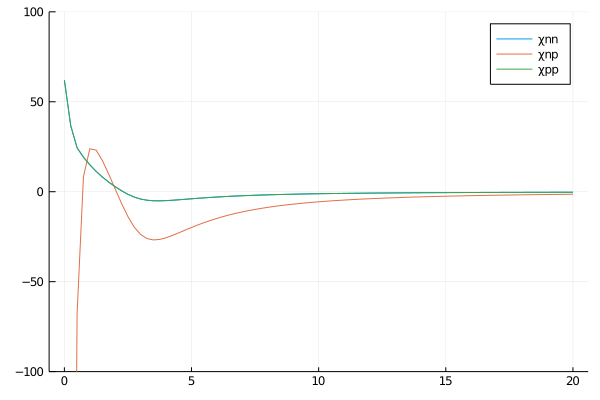

In [90]:
pars = make_pars(8, 8; version=:Simplified)
test_calc_residual_interaction(pars, rs; κ=1, ylims=(-100, 100))

In [93]:
function calc_dispersion_relation(pars, rs, Π₀, χ)
    ngrids = length(rs)
    
    χΠ₀ = zeros(Complex{Float64}, 2ngrids, 2ngrids)
    
    @views χΠ₀[1:ngrids, 1:ngrids] = Diagonal(χ[:,1,1])*Π₀[:,:,1]
    @views χΠ₀[1:ngrids, ngrids+1:2ngrids] = Diagonal(χ[:,1,2])*Π₀[:,:,2]
    @views χΠ₀[ngrids+1:2ngrids, 1:ngrids] = Diagonal(χ[:,2,1])*Π₀[:,:,1]
    @views χΠ₀[ngrids+1:2ngrids, ngrids+1:2ngrids] = Diagonal(χ[:,2,2])*Π₀[:,:,2]
    
    return det(I - χΠ₀)
end

function calc_dispersion_relation(pars, rs; 
        L=1, ωmin=0, ωmax=30, ωlength=300, κ=1, η=0, hf=false)
    
    dens, states, occ, energy = HF_calc(pars, rs)
    
    χ = calc_residual_interaction(pars, rs, dens; κ=κ)
    
    ω = range(ωmin, ωmax, length=ωlength+1)
    dispersion = zeros(Float64, length(ω))
    for i in 1:length(ω)
        Π₀ = calc_free_response_function(pars, rs, states, occ, dens, ω[i], L; η=η)
        dispersion[i] = abs(calc_dispersion_relation(pars, rs, Π₀, χ))
    end
    
    return ω, dispersion
end

calc_dispersion_relation (generic function with 2 methods)

In [97]:
pars = make_pars(8, 8; version=:Simplified)
@time ω, dispersion = 
calc_dispersion_relation(pars, rs; κ=1, L=1, η=0, ωmin=0, ωmax=30)
;

  2.866047 seconds (729.40 k allocations: 1.650 GiB, 10.54% gc time)


dispersion[1] = 0.02288296172939999


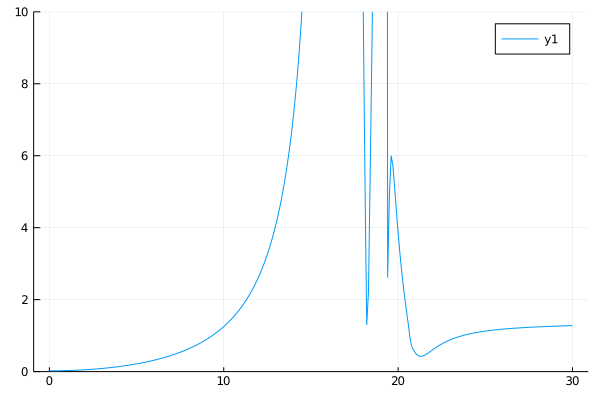

In [98]:
@show dispersion[1]
plot(ω[1:end], dispersion[1:end]; ylims=(0, 10))

In [100]:
function calc_rpa_response_function(pars, rs, Π₀, χ)
    ngrids = length(rs)
    Π₀χ = zeros(Complex{Float64}, 2ngrids, 2ngrids)
    
    @views Π₀χ[1:ngrids, 1:ngrids] = Π₀[:, :, 1]*Diagonal(χ[:, 1, 1])
    @views Π₀χ[1:ngrids, ngrids+1:2ngrids] = Π₀[:, :, 1]*Diagonal(χ[:, 1, 2])
    @views Π₀χ[ngrids+1:2ngrids, 1:ngrids] = Π₀[:, :, 2]*Diagonal(χ[:, 2, 1])
    @views Π₀χ[ngrids+1:2ngrids, ngrids+1:2ngrids] = Π₀[:, :, 2]*Diagonal(χ[:, 2, 2])
    
    M = (I - Π₀χ)\I
    
    Π_rpa = zeros(Complex{Float64}, 2ngrids, 2ngrids)
    @views Π_rpa[1:ngrids, 1:ngrids] = M[1:ngrids, 1:ngrids]*Π₀[:, :, 1]
    @views Π_rpa[1:ngrids, ngrids+1:2ngrids] = M[1:ngrids, ngrids+1:2ngrids]*Π₀[:, :, 2]
    @views Π_rpa[ngrids+1:2ngrids, 1:ngrids] = M[ngrids+1:2ngrids, 1:ngrids]*Π₀[:, :, 1]
    @views Π_rpa[ngrids+1:2ngrids, ngrids+1:2ngrids] = 
        M[ngrids+1:2ngrids, ngrids+1:2ngrids]*Π₀[:, :, 2]
    
    return Π_rpa
end

function test_calc_rpa_response_function(pars, rs, ω, L)
    dens, states, occ, energy = HF_calc(pars, rs)
    
    @time Π₀ = calc_free_response_function(pars, rs, states, occ, dens, ω, L)
    
    @time dens = calc_density(pars, rs, states, occ)
    @time χ = calc_residual_interaction(pars, rs, dens; κ=0.7067)
    
    @time Π_rpa = calc_rpa_response_function(pars, rs, Π₀, χ)
end

test_calc_rpa_response_function (generic function with 1 method)

In [101]:
test_calc_rpa_response_function(pars, rs, 10, 1)

  0.004796 seconds (787 allocations: 3.259 MiB)
  0.000041 seconds (25 allocations: 17.312 KiB)
  0.000059 seconds (50 allocations: 17.391 KiB)
  0.011408 seconds (48 allocations: 2.565 MiB)


162×162 Array{Complex{Float64},2}:
 0.0+0.0im           0.0+0.0im           0.0+0.0im  …           0.0+0.0im
 0.0+0.0im   -9.85306e-6+0.0im   0.000144071+0.0im     -8.82286e-16+0.0im
 0.0+0.0im   0.000144071+0.0im   0.000899777+0.0im      -5.8653e-15+0.0im
 0.0+0.0im   0.000397972+0.0im    0.00258379+0.0im      -1.4074e-14+0.0im
 0.0+0.0im   0.000533619+0.0im    0.00348392+0.0im     -1.83988e-14+0.0im
 0.0+0.0im   0.000219444+0.0im    0.00139817+0.0im  …  -8.22917e-15+0.0im
 0.0+0.0im  -0.000879561+0.0im   -0.00589979+0.0im      2.70895e-14+0.0im
 0.0+0.0im   -0.00299386+0.0im    -0.0199425+0.0im      9.48193e-14+0.0im
 0.0+0.0im   -0.00601614+0.0im    -0.0400184+0.0im      1.91423e-13+0.0im
 0.0+0.0im   -0.00916066+0.0im    -0.0609071+0.0im      2.91774e-13+0.0im
 0.0+0.0im    -0.0110727+0.0im     -0.073606+0.0im  …   3.52718e-13+0.0im
 0.0+0.0im    -0.0108662+0.0im    -0.0722267+0.0im       3.4611e-13+0.0im
 0.0+0.0im   -0.00897137+0.0im    -0.0596291+0.0im      2.85731e-13+0.0im
   

In [125]:
function calc_external_field(rs ; L=1, mode=:IV)
    ngrids = length(rs)
    Vext = zeros(Float64, 2ngrids)
    
    if L==0
        @. Vext[1:ngrids] = rs^2
    elseif L > 0
        @. Vext[1:ngrids] = rs^L
    else
        error("L must be non-negative.")
    end
    
    if mode==:IS # Isoscalar
        Vext[ngrids+1:2ngrids] =  Vext[1:ngrids]
    elseif mode==:IV # Isovector
        Vext[ngrids+1:2ngrids] = -Vext[1:ngrids]
    end
        
    return Vext
end

function calc_dipole_field(pars, rs)
    ngrids = length(rs)
    Vext = zeros(Float64, 2ngrids)
    
    Vext[1:ngrids] = rs*(pars.Z/pars.A)
    Vext[ngrids+1:2ngrids] = -rs*(pars.N/pars.A)
    
    return Vext
end


function calc_strength_function(pars, rs, Π_rpa, Vext, ω, L; η=0)
    Δr = rs[2] - rs[1]
    S = -(Δr^2/π)*imag(Vext' * Π_rpa * Vext)
    return S
end

function continuum_RPA_calc(pars, rs; 
        L=1, ωmin=0, ωmax=30, ωlength=300, mode=:IV, η=0, κ=1, hf=false)
    
    ngrids = length(rs)
    
    dens, states, occ, energy = HF_calc(pars, rs)
    
    χ = calc_residual_interaction(pars, rs, dens; κ=κ)
    
    Vext = calc_external_field(rs ; L=L, mode=mode)
    if mode==:dipole
        Vext = calc_dipole_field(pars, rs)
    end
    
    ω = range(ωmin, ωmax, length=ωlength+1)
    strength_function = zeros(Float64, length(ω))
    Π₀ = zeros(Float64, ngrids, ngrids, 2)
    for i in 1:length(ω)
        Π₀ = calc_free_response_function(pars, rs, states, occ, dens, ω[i], L; η=η)
        Π_rpa = calc_rpa_response_function(pars, rs, Π₀, χ)
        strength_function[i] = 
            calc_strength_function(pars, rs, Π_rpa, Vext, ω[i], L; η=η)
    end
    
    return ω, strength_function
end

continuum_RPA_calc (generic function with 1 method)

In [126]:
pars = make_pars(82, 126; version=:SIII)
L=1
mode = :IS
ωmax=60
ωmin = 0
κ=0.47

@time ω, S₁_hf = continuum_RPA_calc(pars, rs; 
    L=L, mode=mode, κ=κ, ωmax=ωmax, ωmin=ωmin, hf=true)

@time ω, S₂_hf = continuum_RPA_calc(pars, rs; 
    L=L, mode=mode, κ=κ, ωmax=ωmax, ωmin=ωmin, hf=true, η=0.5)
;

AssertionError: AssertionError: n_prot == Z && n_neut == N

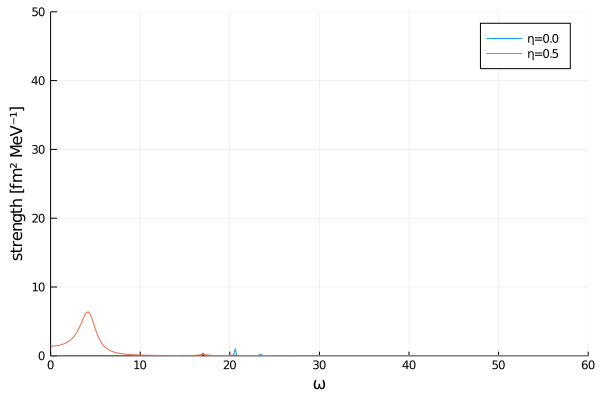

In [119]:
p=plot(xlabel="ω", ylabel="strength [fm² MeV⁻¹]")
plot!(ω, S₁_hf, xlims=(0, 60), label="η=0.0")
plot!(ω, S₂_hf; label="η=0.5")
#savefig("figure/O16_IS_dipole.png")
p